In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score,classification_report,confusion_matrix,log_loss

In [2]:
df = pd.read_csv('training_set.csv',index_col=0)

In [3]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.00,0.56,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.00,0.00,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,1.714,4,12,0
3906,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,2.000,3,4,0
3907,0.12,0.00,0.12,0.00,0.00,0.25,0.00,0.00,0.00,0.00,...,0.0,0.093,0.0,0.023,0.000,0.000,1.247,5,131,0
3908,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.12,0.00,0.00,...,0.0,0.198,0.0,0.198,0.198,0.000,3.857,25,81,1


In [4]:
# Checking the shape of the data
df.shape

(3910, 58)

# Checking for null values

In [5]:
df.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
X24    0
X25    0
X26    0
X27    0
X28    0
X29    0
X30    0
X31    0
X32    0
X33    0
X34    0
X35    0
X36    0
X37    0
X38    0
X39    0
X40    0
X41    0
X42    0
X43    0
X44    0
X45    0
X46    0
X47    0
X48    0
X49    0
X50    0
X51    0
X52    0
X53    0
X54    0
X55    0
X56    0
X57    0
Y      0
dtype: int64

We have 0 missing values in our dataset

In [6]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,...,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,0.102990,0.206419,0.284419,0.062074,0.311309,0.095974,0.112320,0.106041,0.091146,0.244345,...,0.037493,0.139252,0.015876,0.272971,0.077820,0.043828,5.047150,52.338107,283.059079,0.392327
std,0.296322,1.253828,0.504352,1.369361,0.656195,0.261455,0.389516,0.398694,0.271417,0.667065,...,0.235054,0.276309,0.083600,0.858634,0.256991,0.452862,31.397035,204.445218,578.339858,0.488331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.580750,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.263500,15.000000,94.000000,0.000000
75%,0.000000,0.000000,0.430000,0.000000,0.387500,0.000000,0.000000,0.000000,0.000000,0.170000,...,0.000000,0.188000,0.000000,0.317250,0.054000,0.000000,3.714000,43.000000,264.000000,1.000000
max,4.340000,14.280000,4.540000,42.810000,9.090000,3.570000,7.270000,11.110000,3.230000,18.180000,...,4.385000,9.752000,2.777000,32.478000,6.003000,19.829000,1102.500000,9989.000000,10062.000000,1.000000


# Checking the distribution of Y

In [10]:
df['Y'].value_counts(normalize=True)

0    0.607673
1    0.392327
Name: Y, dtype: float64

We have 60% 0s and only 40% 1s in our dataset.

# Plotting distribution of features

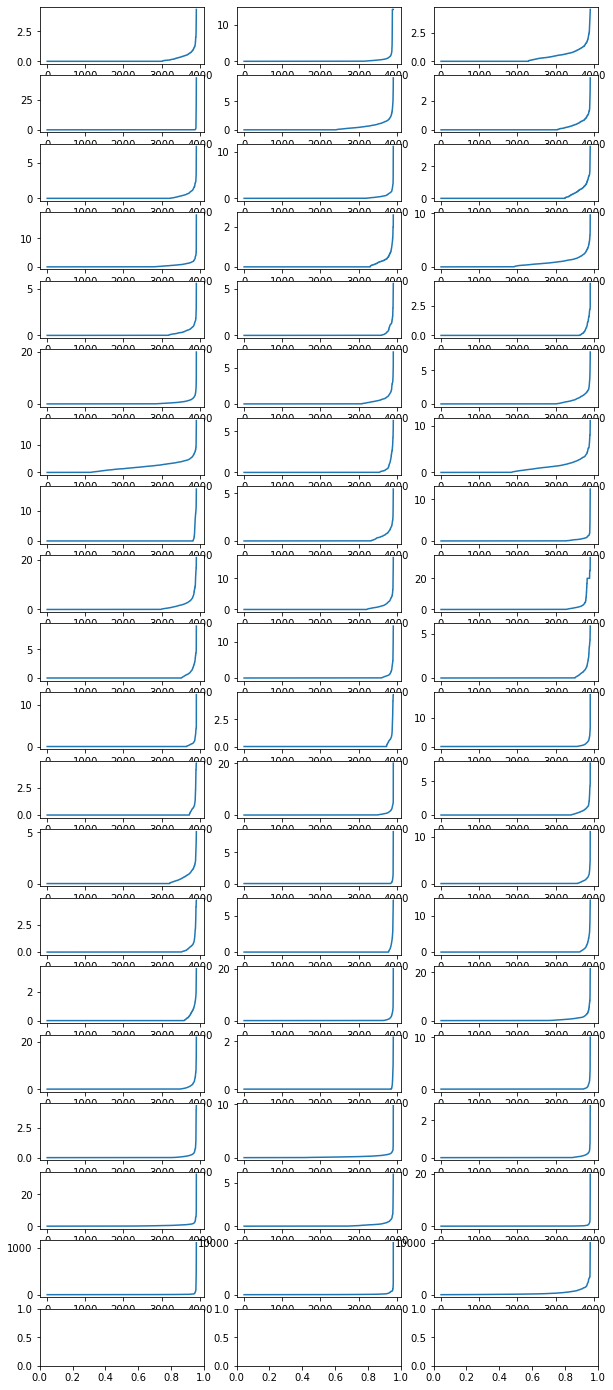

In [14]:
fig,ax = plt.subplots(nrows=20,ncols=3,figsize=(10,25))
j = 0
k = 0
for i in range(1,58):
    if k>2:
        k=0
        j= j+1
    ax[j][k].plot(sorted(df['X'+str(i)]));
    k=k+1

- The distributions of all the features are highly skewed.
- Maximum values in our features are 0s. i.e. our data is highly sparse.
- All the features in our dataset are continous.

# Splitting into X and y

In [16]:
X = df.drop(columns=['Y'])
y = df['Y']

- Now if we choose Dimensionality reduction then we will lose interpretability here.
- And if we choose the feature selection method to extract top important features we can preserve interpretability.

# Train Test Split

- We want our train and validation set in the ratio of 4:1.
- Which means we would have 20% of the data as validation set.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Using RandomForest Classifier for feature Selection

In [18]:
clf = RandomForestClassifier(100, max_depth=None, n_jobs=-1)
clf.fit(X_train,y_train)
feature_importance = clf.feature_importances_

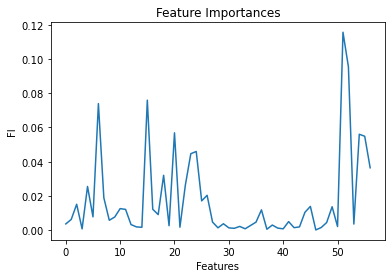

In [19]:
x = [x for x in range(X_train.shape[1])]
plt.plot(x,feature_importance)
plt.xlabel("Features")
plt.ylabel("FI")
plt.title("Feature Importances")
plt.show()

In [20]:
# Finding total features having greater feature importance than average
mean_fi = np.mean(feature_importance)
top_fi = len(np.where(feature_importance > mean_fi)[0])
print(f'Total features having feature importance greater than average are {top_fi}')

Total features having feature importance greater than average are 15


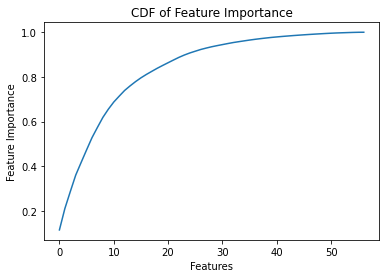

In [21]:
# CDF Plot of Feature Importance
plt.plot(np.cumsum(sorted(feature_importance,reverse=True)))
plt.title('CDF of Feature Importance')
plt.xlabel('Features')
plt.ylabel('Feature Importance');

- From the CDF plot, we tend to infer that 30 feature's importance add upto very near to one.

In [22]:
# Ranking the features with their respect to feature importances
fi = sorted(zip(X.columns,feature_importance),key=lambda x: x[1], reverse=True)
# Extracting Top 30 features
top_features = [x[0] for x in fi[:30]]

In [23]:
# Selecting the top features from data
X_train_dash = X_train[top_features]
X_test_dash = X_test[top_features]

In [24]:
# Checking the shape of X_train_dash
X_train_dash.shape

(3128, 30)

In [25]:
# Checking the shape of X_test_dash
X_test_dash.shape

(782, 30)

# Normalizing our data

In [26]:
# Using StandardScaler to normalize our data
scaler = StandardScaler()
scaler.fit(X_train_dash)

# transform
X_train_dash = pd.DataFrame(scaler.transform(X_train_dash),columns=X_train_dash.columns)
X_test_dash = pd.DataFrame(scaler.transform(X_test_dash),columns=X_test_dash.columns)

# Metrics to consider

- Since we have binary values in our class labels, so we can choose Binary Cross Entropy here.
- Also, we can use AUC score here.
- The class is roughly balance, so we need not need to use metrics like F1 score here.

# Training

Models tried:

- Random
- KNN
- Naive Bayes
- Logistic Regression
- DecisionTree
- Random Forest
- xgboost

# Random Model

In [28]:
#y_pred_test = np.random.binomial(1,0.5,size=len(X_test_dash))
y_train_prob = np.random.rand(len(X_train_dash))
y_test_prob = np.random.rand(len(X_test_dash))

In [29]:
# Calculating logloss score for our model
print(f'Train Logloss for the model -> {log_loss(y_train,y_train_prob)}')
print(f'Test Logloss for the model -> {log_loss(y_test,y_test_prob)}')

print('-'*50)
# Calculating the AUC score for our model
print(f'Train AUC Score for the model -> {roc_auc_score(y_train, y_train_prob)}')
print(f'Test AUC Score for the model -> {roc_auc_score(y_test, y_test_prob)}')

Train Logloss for the model -> 1.012883909922409
Test Logloss for the model -> 1.0709196315400824
--------------------------------------------------
Train AUC Score for the model -> 0.49517240314903105
Test AUC Score for the model -> 0.44468369621121207


# KNN

In [30]:
estimator = KNeighborsClassifier()
parameters = {'n_neighbors':[3,5,11,15,25,51,75]}

# Performing GridSearchCV
clf = GridSearchCV(estimator, parameters, cv=10, n_jobs=-1, scoring='roc_auc', return_train_score=True)
clf.fit(X_train_dash, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 11, 15, 25, 51, 75]},
             return_train_score=True, scoring='roc_auc')

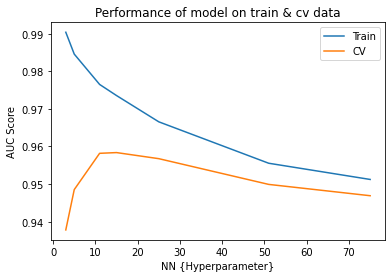

In [31]:
# Storing all the results of GridSearchCV in a DataFrame
results = pd.DataFrame.from_dict(clf.cv_results_)
#results.head()

x = list(results['param_n_neighbors'].values)
y1 = results['mean_train_score'].values
y2 = results['mean_test_score'].values

plt.plot(x, y1, label='Train')
plt.plot(x, y2, label='CV')
plt.legend()
plt.xlabel('NN {Hyperparameter}')
plt.ylabel('AUC Score')
plt.title('Performance of model on train & cv data');

In [32]:
# Using 30-NN for predictions
classifier = KNeighborsClassifier(n_neighbors=30) 
classifier.fit(X_train_dash, y_train)

y_train_pred = classifier.predict(X_train_dash)
y_train_prob = classifier.predict_proba(X_train_dash)[:,1]
y_test_pred = classifier.predict(X_test_dash)
y_test_prob = classifier.predict_proba(X_test_dash)[:,1]


# Calculating logloss score for our model
print(f'Train Logloss for the model -> {log_loss(y_train,y_train_prob)}')
print(f'Test Logloss for the model -> {log_loss(y_test,y_test_prob)}')

print('-'*50)
# Calculating the AUC score for our model
print(f'Train AUC Score for the model -> {roc_auc_score(y_train, y_train_prob)}')
print(f'Test AUC Score for the model -> {roc_auc_score(y_test, y_test_prob)}')

Train Logloss for the model -> 0.2491633523572242
Test Logloss for the model -> 0.3749359123005589
--------------------------------------------------
Train AUC Score for the model -> 0.9651375954061839
Test AUC Score for the model -> 0.9457603291616664


# Naive Bayes

In [33]:
# Using Gaussian Naive Bayes
classifier = GaussianNB()
classifier.fit(X_train_dash, y_train)

y_train_pred = classifier.predict(X_train_dash)
y_train_prob = classifier.predict_proba(X_train_dash)[:,1]
y_test_pred = classifier.predict(X_test_dash)
y_test_prob = classifier.predict_proba(X_test_dash)[:,1]


# Calculating logloss score for our model
print(f'Train Logloss for the model -> {log_loss(y_train,y_train_prob)}')
print(f'Test Logloss for the model -> {log_loss(y_test,y_test_prob)}')

print('-'*50)
# Calculating the AUC score for our model
print(f'Train AUC Score for the model -> {roc_auc_score(y_train, y_train_prob)}')
print(f'Test AUC Score for the model -> {roc_auc_score(y_test, y_test_prob)}')

Train Logloss for the model -> 1.201245986759754
Test Logloss for the model -> 1.544122021788011
--------------------------------------------------
Train AUC Score for the model -> 0.9605097818803383
Test AUC Score for the model -> 0.9433053317332419


# Logistic Regression

In [34]:
# Using l2 norm
estimator = LogisticRegression(penalty='l2', max_iter=250, random_state=42)
parameters = {'C':[1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4]}

# Performing GridSearchCV
clf = GridSearchCV(estimator, parameters, cv=10, n_jobs=-1, scoring='neg_log_loss', return_train_score=True)
clf.fit(X_train_dash, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=250, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                               1000.0, 10000.0]},
             return_train_score=True, scoring='neg_log_loss')

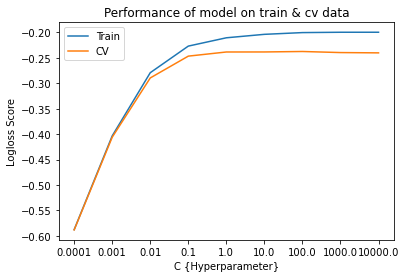

In [35]:
# Storing all the results of GridSearchCV in a DataFrame
results = pd.DataFrame.from_dict(clf.cv_results_)
#results.head()

x = list(map(str,results['param_C'].values))
y1 = results['mean_train_score'].values
y2 = results['mean_test_score'].values

plt.plot(x, y1, label='Train')
plt.plot(x, y2, label='CV')
plt.legend()
plt.xlabel('C {Hyperparameter}')
plt.ylabel('Logloss Score')
plt.title('Performance of model on train & cv data');

In [36]:
# Using Logistic Regression with l2 norm
classifier = LogisticRegression(C=1, penalty='l2', max_iter=250, random_state=42)
classifier.fit(X_train_dash, y_train)

y_train_pred = classifier.predict(X_train_dash)
y_train_prob = classifier.predict_proba(X_train_dash)[:,1]
y_test_pred = classifier.predict(X_test_dash)
y_test_prob = classifier.predict_proba(X_test_dash)[:,1]


# Calculating logloss score for our model
print(f'Train Logloss for the model -> {log_loss(y_train,y_train_prob)}')
print(f'Test Logloss for the model -> {log_loss(y_test,y_test_prob)}')

print('-'*50)
# Calculating the AUC score for our model
print(f'Train AUC Score for the model -> {roc_auc_score(y_train, y_train_prob)}')
print(f'Test AUC Score for the model -> {roc_auc_score(y_test, y_test_prob)}')

Train Logloss for the model -> 0.21159755457819635
Test Logloss for the model -> 0.32924983052093154
--------------------------------------------------
Train AUC Score for the model -> 0.9733958063507947
Test AUC Score for the model -> 0.958779358820504


# Decision Tree

In [37]:
# Using Decision Tree
classifier = DecisionTreeClassifier(criterion='gini',min_samples_split=3,random_state=42)
classifier.fit(X_train_dash, y_train)

y_train_pred = classifier.predict(X_train_dash)
y_train_prob = classifier.predict_proba(X_train_dash)[:,1]
y_test_pred = classifier.predict(X_test_dash)
y_test_prob = classifier.predict_proba(X_test_dash)[:,1]


# Calculating logloss score for our model
print(f'Train Logloss for the model -> {log_loss(y_train,y_train_prob)}')
print(f'Test Logloss for the model -> {log_loss(y_test,y_test_prob)}')

print('-'*50)
# Calculating the AUC score for our model
print(f'Train AUC Score for the model -> {roc_auc_score(y_train, y_train_prob)}')
print(f'Test AUC Score for the model -> {roc_auc_score(y_test, y_test_prob)}')

Train Logloss for the model -> 0.00531826481248139
Test Logloss for the model -> 2.9663304120410774
--------------------------------------------------
Train AUC Score for the model -> 0.9999691321901097
Test AUC Score for the model -> 0.9094976855820334


# Random Forest

In [38]:
# Using Random Forest
classifier = RandomForestClassifier(n_estimators=500,
                                      max_depth=None,
                                      min_samples_split=2,
                                      n_jobs=-1,
                                      class_weight='balanced',
                                      random_state=42)
classifier.fit(X_train_dash, y_train)

y_train_pred = classifier.predict(X_train_dash)
y_train_prob = classifier.predict_proba(X_train_dash)[:,1]
y_test_pred = classifier.predict(X_test_dash)
y_test_prob = classifier.predict_proba(X_test_dash)[:,1]


# Calculating logloss score for our model
print(f'Train Logloss for the model -> {log_loss(y_train,y_train_prob)}')
print(f'Test Logloss for the model -> {log_loss(y_test,y_test_prob)}')

print('-'*50)
# Calculating the AUC score for our model
print(f'Train AUC Score for the model -> {roc_auc_score(y_train, y_train_prob)}')
print(f'Test AUC Score for the model -> {roc_auc_score(y_test, y_test_prob)}')

Train Logloss for the model -> 0.043844500133648386
Test Logloss for the model -> 0.14559635679079055
--------------------------------------------------
Train AUC Score for the model -> 0.9999991425608363
Test AUC Score for the model -> 0.9927618721069774


# Xgboost

In [39]:
# Using Xgboost
classifier = XGBClassifier(n_estimators=500,
                           max_depth=5,
                           learning_rate=0.15,
                           colsample_bytree=1,
                           subsample=1,
                           reg_alpha = 0.3,
                           gamma=10,
                           n_jobs=-1,
                           eval_metric='logloss',
                           use_label_encoder=False)

classifier.fit(X_train_dash, y_train)

y_train_pred = classifier.predict(X_train_dash)
y_train_prob = classifier.predict_proba(X_train_dash)[:,1]
y_test_pred = classifier.predict(X_test_dash)
y_test_prob = classifier.predict_proba(X_test_dash)[:,1]


# Calculating logloss score for our model
print(f'Train Logloss for the model -> {log_loss(y_train,y_train_prob)}')
print(f'Test Logloss for the model -> {log_loss(y_test,y_test_prob)}')

print('-'*50)
# Calculating the AUC score for our model
print(f'Train AUC Score for the model -> {roc_auc_score(y_train, y_train_prob)}')
print(f'Test AUC Score for the model -> {roc_auc_score(y_test, y_test_prob)}')

Train Logloss for the model -> 0.1430706430462968
Test Logloss for the model -> 0.15659173917563637
--------------------------------------------------
Train AUC Score for the model -> 0.988952325096344
Test AUC Score for the model -> 0.9873889936567805


# Observations

- The Xgboost have the least gap between the train and test logloss.
- As we know the divergence between train and test metrics depicts overfitting or underfitting of a model.
- Clearly in the Xgboost we don't have any overfitting here.
- And Xgboost has least logloss for test data. i.e. Test logloss is 0.154.
- So, we will choose Xgboost as our classifier here.